# Topic 27: K-Nearest Neighbors<br> +Topic 32: Pipelines

onl01-dtsc-ft-022221
05/10/21

### Learning Objectives:


- Understand the different distance metrics
- Understand how K-Nearest Neighbors works 
- Review the KNN with Scikit Learn Lab together 
- Introduce using `Pipeline`s for Preprocessing and Modeling
    - Add Pipelines to the Knn with Scikit learn lab.
    - [If there's time:] adding the `ColumnTransformer` for all preprocessing.


# Questions

# Distance Metrics

- K-nearest neighbors is a distance-based model. 
- There are multiple ways of calculating distance. 

### Manhattan Distance

<img src ="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-ft-100719/master/images/manhattan_fs.png" width=40%>


$$ \large d(x,y) = \sum_{i=1}^{n}|x_i - y_i | $$  
> - "The right side of the equals sign means "calculate the absolute number of units you move in each distinct dimension, and then sum them all up"."
- "The  $\Sigma$  just means "the cumulative sum of each step". In a given step, you take a dimension, and then look at the corresponding values for that dimension on point X and point Y. 
- You then compute the absolute value of the difference between them by subtracting Y's value for that dimension from X's value for that dimension, and then add it to our total."

### Euclidian

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-ft-100719/master/images/euclidean_fs.png" width=20%>

 The equation at the heart of this one is probably familiar to you: $a^2 + b^2 = c^2$, or the **_Pythagorean theorem_**
 
 $$ \large d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $$  


### Minkowski

- A generalized distance metric across a _Normed Vector Space_.
> - "A Normed Vector Space"= a collection of space where each point has been processed by a function (any function, as long it meets two criteria:)<br><br>1. the zero vector (just a vector filled with zeros) will output a length of 0, and<br>
    2. every other vector must have a positive length 

$$\large d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^c\right)^\frac{1}{c}$$  


> **Both the Manhattan and Euclidean distances are actually _special cases of Minkowski distance_.**
- Manhattan Distance: 
    - c = 1
- Euclidean Distance:
    - c = 2


# K Nearest Neighbors

- Supervised Learning
- Classification OR regression.


### Predicting the Class for the Red Dot
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-pt-100719/master/images/knn_fs.png" width=50%>


## Get the classes of the K closest points to use as predictions
- Each neighbor "votes" on which class the unknown point belongs to. 

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-finding-the-best-value-for-k-onl01-dtsc-pt-041320/master/images/best_k_fs.png" width=50%>

#### How KNN "Voting" works

<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-k-nearest-neighbors/master/images/knn.gif" width=60%>

### Finding the Best K Using Elbow Plots

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-finding-the-best-value-for-k-onl01-dtsc-pt-041320/master/images/plot_fs.png" width=50%>

# Activity: KNN with Scikit Learn - Lab


___

## Part 1: The Manual/Solution Way

> Hop over to "`KNN with scikit-learn - Lab-SG.ipynb`"

- [Lab Repo](https://github.com/learn-co-curriculum/dsc-k-nearest-neighbors-lab)

## Part 2: The Pipeline + GridSearch Way

> NOTE TO SELF: I've started adding GridSearch, Pipelines, and ColumnTransformer in the ` KNN with scikit-learn - Lab + pipelines.ipynb`'

In [1]:
# Import pandas and set the standard alias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn import metrics
from sklearn.model_selection import GridSearchCV


## New Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

In [2]:
# Import the data from 'titanic.csv' and store it in a pandas DataFrame 
# raw_df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
raw_df = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-knn-with-scikit-learn-lab/master/titanic.csv')
raw_df.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'],
            inplace=True)

# Print the head of the DataFrame to ensure everything loaded correctly 
df = raw_df.copy()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


> ### Create training and test sets
* Use `train_test_split()` to split the data into training and test sets, with a `test_size` of `0.25`. Set the `random_state` to 42 

In [3]:

## Get X, y and train-test-split
target = 'Survived'
X = df.drop(columns=target).copy()
y = df[target].copy()


## train tst split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,
                                                    random_state=42)
[print(var.shape) for var in [X_train, X_test]];

(668, 7)
(223, 7)


### Required Preprocessing

> Since you've done this before, you should be able to do this quite well yourself without much hand holding by now. In the cells below, complete the following steps:
1. ~~Remove unnecessary columns (`'PassengerId'`, `'Name'`, `'Ticket'`, and `'Cabin'`) ~~
2. Convert `'Sex'` to a binary encoding, where female is `0` and male is `1` 
3. Detect and deal with any missing values in the dataset:  
    * For `'Age'`, replace missing values with the median age for the dataset  
    * For `'Embarked'`, drop the rows that contain missing values
4. One-hot encode categorical columns such as `'Embarked'` 
5. Store the target column, `'Survived'`, in a separate variable and remove it from the DataFrame  

> #### Normalizing the data 
* Import and instantiate `StandardScaler` 
* Use the scaler's `.fit_transform()` method to create a scaled version of the training dataset  
* Use the scaler's `.transform()` method to create a scaled version of the test dataset  
* The result returned by `.fit_transform()` and `.transform()` methods will be numpy arrays, not a pandas DataFrame. Create a new pandas DataFrame out of this object called `scaled_df`. To set the column names back to their original state, set the `columns` parameter to `one_hot_df.columns` 
* Print the head of `scaled_df` to ensure everything worked correctly 

## Preprocessing with Pipelines

- [Pipeline Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [4]:
from sklearn.pipeline import Pipeline, make_pipeline


### Preprocess Numeric Columns

In [5]:
## Get list of numeric features to sacle
# target='Survived'
num_cols = X_train.select_dtypes('number').columns.tolist()
num_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [6]:
## Create a num_trasnformer pipeline 
## that will impute using median and then calculate z-scores
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())])

In [7]:
## .fit_transform X_train
X_train_tf = num_transformer.fit_transform(X_train[num_cols])
X_test_tf = num_transformer.transform(X_test[num_cols])
X_train_tf

array([[-1.62051704, -0.08764782, -0.46765956, -0.46887833, -0.0325683 ],
       [ 0.80934914, -0.31820308, -0.46765956, -0.46887833, -0.48733085],
       [-0.40558395, -0.39505484, -0.46765956,  2.04687047, -0.34285405],
       ...,
       [ 0.80934914,  0.91142501,  1.22097065, -0.46887833, -0.35045024],
       [-1.62051704, -1.1635724 ,  0.37665554,  2.04687047,  1.7030926 ],
       [-1.62051704, -0.62561011, -0.46765956,  0.78899607,  0.8747751 ]])

#### Categorical Features


In [8]:
## Get list of cat features to encode
cat_cols = X_train.select_dtypes('O').columns.tolist()
cat_cols

['Sex', 'Embarked']

In [9]:
## Create a cat_transformer pipeline 
## that will impute using median and then calculate z-scores
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

In [10]:
## Fit-transform data
X_train_cat =cat_transformer.fit_transform(X_train[cat_cols])
X_test_cat =cat_transformer.transform(X_test[cat_cols])

X_train_cat 

array([[0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.]])

 ##  Putting it all together with `ColumnTransformer`



- [ColumnTransformer Documentation](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

In [11]:
from sklearn.compose import ColumnTransformer,make_column_transformer
# from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn import set_config
set_config(display='diagram')

In [12]:
## Display Pipelines from earlier
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())])

In [13]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessing=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'Embarked'])])

### Viewing Pipeline

In [14]:
from sklearn import set_config
set_config(display='diagram')

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'Embarked'])])

In [15]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

In [16]:
X_train_tf

array([[-1.62051704, -0.08764782, -0.46765956, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.80934914, -0.31820308, -0.46765956, ...,  0.        ,
         1.        ,  0.        ],
       [-0.40558395, -0.39505484, -0.46765956, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.80934914,  0.91142501,  1.22097065, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62051704, -1.1635724 ,  0.37665554, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62051704, -0.62561011, -0.46765956, ...,  0.        ,
         1.        ,  0.        ]])

### Finding Feature Names

In [17]:
set_config(display='text')

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'Embarked'])])

In [18]:
## Explore the named_transformers
preprocessing.named_transformers_

{'num': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scale', StandardScaler())]),
 'cat': Pipeline(steps=[('imputer',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('encoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))])}

In [19]:
## Slice out the 'cat' transformer and inspect .named_steps
preprocessing.named_transformers_['cat'].named_steps

{'imputer': SimpleImputer(fill_value='missing', strategy='constant'),
 'encoder': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [20]:
## Slice out the 'encoder' from the cat transformers' named_steps
preprocessing.named_transformers_['cat'].named_steps['encoder']

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [21]:
## Use the encoder's .get_feature_names
feature_names = preprocessing.named_transformers_['cat'].\
                named_steps['encoder'].get_feature_names(cat_cols).tolist()
feature_names

['Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_missing']

In [22]:
## Find the encoder inside the cat transformer
X_cols = num_cols+feature_names
X_cols

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_missing']

In [23]:
## Use the encoder.get_feature_names()
X_train_df = pd.DataFrame(X_train_tf,columns=X_cols,index=X_train.index)
X_test_df = pd.DataFrame(X_test_tf,columns=X_cols,index=X_test.index)
X_train_df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
298,-1.620517,-0.087648,-0.467660,-0.468878,-0.032568,0.0,1.0,0.0,0.0,1.0,0.0
884,0.809349,-0.318203,-0.467660,-0.468878,-0.487331,0.0,1.0,0.0,0.0,1.0,0.0
247,-0.405584,-0.395055,-0.467660,2.046870,-0.342854,1.0,0.0,0.0,0.0,1.0,0.0
478,0.809349,-0.548758,-0.467660,-0.468878,-0.478201,0.0,1.0,0.0,0.0,1.0,0.0
305,-1.620517,-2.168793,0.376656,2.046870,2.314937,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,0.809349,-0.625610,-0.467660,-0.468878,-0.475695,1.0,0.0,0.0,0.0,1.0,0.0
270,-1.620517,-0.087648,-0.467660,-0.468878,-0.022872,0.0,1.0,0.0,0.0,1.0,0.0
860,0.809349,0.911425,1.220971,-0.468878,-0.350450,0.0,1.0,0.0,0.0,1.0,0.0
435,-1.620517,-1.163572,0.376656,2.046870,1.703093,1.0,0.0,0.0,0.0,1.0,0.0


> ## Fit a KNN model
Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy. 
In the cells below:
* Import `KNeighborsClassifier` from the `sklearn.neighbors` module 
* Instantiate the classifier. For now, you can just use the default parameters  
* Fit the classifier to the training data/labels
* Use the classifier to generate predictions on the test data. Store these predictions inside the variable `test_preds` 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
set_config(display='diagram')

In [25]:
## Use our preprocessor as the first step in a modeling pipelien
knn_pipe = Pipeline(steps=[('preprocessing',preprocessing),
                          ('knn',KNeighborsClassifier())])
knn_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'Embarked'])])),
                ('knn', KNeighborsClassifier())])

In [26]:
## Fit pipeline
set_config(display='text')
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder'

In [27]:
## Get predictions, score
y_hat_test = knn_pipe.predict(X_test)
print(metrics.classification_report(y_test,y_hat_test))
# pipeline.score(X_test,y_test)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       134
           1       0.78      0.74      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



> ## Evaluate the model
- Here we will deviate and we will use the assignment/challenge function `evaluate_classification` from sect 25-Pt2 s.g.

### ✅ Activity: Make an `evaluate_classification` function

- From last class

In [28]:
import sklearn.metrics as metrics

def evaluate_classification(model,X_test,y_test,classes=None,
                           normalize='true',cmap='Purples',label=''):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"
    
    ## Add Label if given
    if len(label)>0:
        table_header += f" {label}"
        
    
    ## PRINT CLASSIFICATION REPORT
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))
    
    report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes,
                                          output_dict=True)
    print(dashes+"\n\n")
    
    

    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Plot Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Plot Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()
    
#     return report #fig,axes

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       134
           1       0.78      0.74      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

------------------------------------------------------------




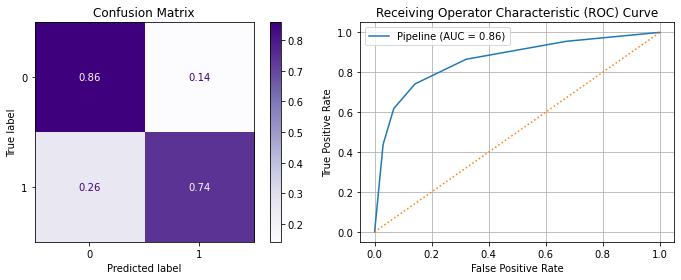

In [29]:
## Evaluate model with our function
evaluate_classification(knn_pipe,X_test,y_test)

> Interpret each of the metrics above, and explain what they tell you about your model's capabilities. If you had to pick one score to best describe the performance of the model, which would you choose? Explain your answer.
- Discuss as a group


>## Improve model performance
While your overall model results should be better than random chance, they're probably mediocre at best given that you haven't tuned the model yet. For the remainder of this notebook, you'll focus on improving your model's performance. Remember that modeling is an **_iterative process_**, and developing a baseline out of the box model such as the one above is always a good start. <br>
First, try to find the optimal number of neighbors to use for the classifier. To do this, complete the `find_best_k()` function below to iterate over multiple values of K and find the value of K that returns the best overall performance. <br><br>
**The function takes in six arguments:**
* `X_train`
* `y_train`
* `X_test`
* `y_test`
* `min_k` (default is 1)
* `max_k` (default is 25)
    
> **Pseudocode Hint**:
1. Create two variables, `best_k` and `best_score`
1. Iterate through every **_odd number_** between `min_k` and `max_k + 1`. 
    1. For each iteration:
        1. Create a new `KNN` classifier, and set the `n_neighbors` parameter to the current value for k, as determined by the loop 
        1. Fit this classifier to the training data 
        1. Generate predictions for `X_test` using the fitted classifier 
        1. Calculate the **_F1-score_** for these predictions 
        1. Compare this F1-score to `best_score`. If better, update `best_score` and `best_k` 
1. Once all iterations are complete, print the best value for k and the F1-score it achieved 

### Finding the Best K

In [30]:
# import warnings
# warnings.filterwarnings('ignore')
# set_config(display='diagram')

#### Can we GridSearch with a Pipeline?



> #### YES! Param Grids for Pipelines:
- Add the name of the step plus a dunder `__` as a prefix to the param name.

In [31]:
# set_config(display='text')
knn_pipe.named_steps

{'preprocessing': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scale', StandardScaler())]),
                                  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                 ('cat',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(fill_value='missing',
                                                                 strategy='constant')),
                                                  ('encoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  ['Sex', 'Embarked'])]),
 'knn': KNeighborsClassifier()}

In [32]:

## Create Params grid for n_neighbors
params = {'knn__n_neighbors':list(range(1,26,2))}
params
## Create a GridSearch using F1 as scoring
grid = GridSearchCV(knn_pipe,params,scoring='f1')

In [33]:
## Fit and print best params
grid.fit(X_train, y_train)
grid.best_params_

{'knn__n_neighbors': 21}

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       134
           1       0.82      0.71      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223

------------------------------------------------------------




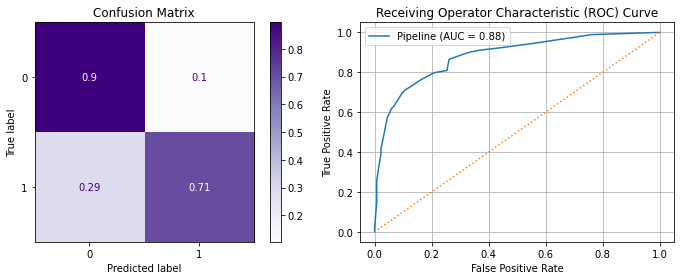

In [34]:
## Evaluate Model
evaluate_classification(grid.best_estimator_,X_test,y_test)

<AxesSubplot:xlabel='param_knn__n_neighbors'>

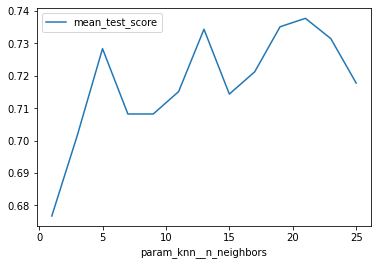

In [35]:
pd.DataFrame(grid.cv_results_).plot('param_knn__n_neighbors','mean_test_score')

### But how do we see the elbow plot for ks?

In [36]:
knn_pipe


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder'

> ## ~~(Optional) Level Up:~~ Iterating on the data
As an ~~optional (but recommended!)~~ exercise:
- think about the decisions you made during the preprocessing steps that could have affected the overall model performance. 
    - For instance, you were asked to **replace the missing age values with the column median.** Could this have affected the overall performance? 
    - How might the model have fared if you had just dropped those rows, instead of using the column median? 
    - What if you reduced the data's dimensionality by ignoring some less important columns altogether?
- In the cells below, revisit your preprocessing stage and see if you can improve the overall results of the classifier by doing things differently. 
    - Consider dropping certain columns, dealing with missing values differently, or using an alternative scaling function. 
    - Then see how these different preprocessing techniques affect the performance of the model. 
    - Remember that the `find_best_k()` function handles all of the fitting; use this to iterate quickly as you try different strategies for dealing with data preprocessing! 

> #### KNN PARAMS:
- n_neighbors - 1-25(odd)
- weights : uniform/distance
- metric: euclidean,minkowski,manhattan

> #### Prerocessing Params:
    - strategty='median','mean

In [47]:
import sklearn
sklearn.neighbors.VALID_METRICS['brute']

['cityblock',
 'cosine',
 'euclidean',
 'haversine',
 'l2',
 'l1',
 'manhattan',
 'precomputed',
 'nan_euclidean',
 'braycurtis',
 'canberra',
 'chebyshev',
 'correlation',
 'cosine',
 'dice',
 'hamming',
 'jaccard',
 'kulsinski',
 'mahalanobis',
 'matching',
 'minkowski',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule',
 'wminkowski']

In [48]:
params =  {'preprocessing__num__imputer__strategy':['mean','median'],
          'knn__n_neighbors':list(range(1,26,2)),
          'knn__metric':['euclidean','minkowski','manhattan']}
grid = GridSearchCV(knn_pipe,params,scoring='f1')
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
            

In [49]:
grid.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder'

In [50]:
grid.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 11,
 'preprocessing__num__imputer__strategy': 'median'}

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       134
           1       0.80      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223

------------------------------------------------------------




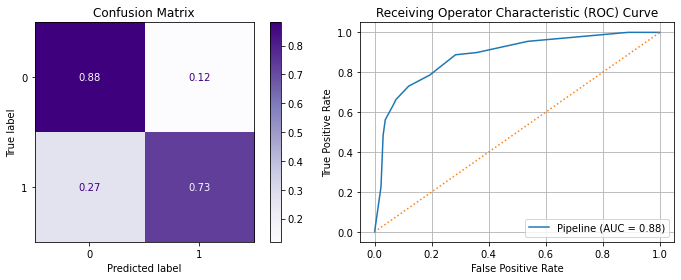

In [51]:
evaluate_classification(grid.best_estimator_, X_test,y_test)

# So why use pipelines?

### For one, you Can Easily Add Other Models 

In [41]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# GaussianNB()

In [42]:
# PIPES = {}

# models = [('knn',KNeighborsClassifier), 
#           ('bayes',GaussianNB),
#           ('rf',RandomForestClassifier),
#               ('log',LogisticRegression),
#               ('svc',SVC)]


# for name,model in models:
#     PIPES[name] = Pipeline(steps=[('preprocessor',preprocessing),
#                                  (name,model())])
    
# PIPES['rf']

In [43]:
# RESULTS = {}
# for name, pipe in PIPES.items():
#     RESULTS[name] = evaluate_classification(pipe.fit(X_train,y_train),
#                                             X_test,y_test,label=name)


In [44]:
# row = '1'#'macro avgx'
# col = 'f1-score'
# for model,res_df in RESULTS.items():
# #     RESULTS['rf']
#     print(f"For {model}: {row} {col} = {res_df.loc[row,col]}")
    

# APPENDIX

## Yellow Brick Visulizations

In [45]:
# from sklearn.neighbors import KNeighborsClassifier
# from yellowbrick.contrib.classifier import DecisionViz
